Assignment Task  3

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import pickle
import re


import plotly.graph_objects as go
import plotly.express as px

## 4.  US Presidents

**4.1** Open ``US_presidents.csv`` as dataframe. Write a Python code that filters a given DataFrame to extract the information of the nine US presidents who had not won a presidential election before assuming office.


In [ ]:
data='US_presidents.csv'
df = pd.read_csv(data)
df.head(10).T

def cond_func(row):
    if row['end'] - row['start']== 8:
        return row['name']
    else:
        return ''

df['max_col'] = df.apply(lambda row: cond_func(row), axis=1)
df['max_col']


0        George Washington
1                         
2         Thomas Jefferson
3            James Madison
4             James Monroe
5                         
6           Andrew Jackson
7                         
8                         
9                         
10                        
11                        
12                        
13                        
14                        
15                        
16                        
17        Ulysses S. Grant
18                        
19                        
20                        
21                        
22                        
23                        
24                        
25      Theodore Roosevelt
26                        
27          Woodrow Wilson
28                        
29                        
30                        
31                        
32         Harry S. Truman
33    Dwight D. Eisenhower
34                        
35                        
36                        
3

In [ ]:
data='US_presidents.csv'
df = pd.read_csv(data)
data_election= df[(df['end']-df['start'] == 4)]
data_election.head(10)

,Unnamed: 0,link,name,election_years,start,end,n_words,texts
1,1,https://en.wikipedia.org/wiki/John_Adams,John Adams,1796,1797,1801.0,19919,"['', '', 'John Adams (October 30, 1735[a] – Ju..."
5,5,https://en.wikipedia.org/wiki/John_Quincy_Adams,John Quincy Adams,1824,1825,1829.0,12759,"['', '', 'John Quincy Adams (/ˈkwɪnzi/ (listen..."
7,7,https://en.wikipedia.org/wiki/Martin_Van_Buren,Martin Van Buren,1836,1837,1841.0,12778,"['', ""Martin Van Buren (/væn ˈbjʊərən/ van BYU..."
9,9,https://en.wikipedia.org/wiki/John_Tyler,John Tyler,NaN,1841,1845.0,15788,"['', ""John Tyler (March 29, 1790 – January 18,..."
10,10,https://en.wikipedia.org/wiki/James_K._Polk,James K. Polk,1844,1845,1849.0,17329,"['', 'James Knox Polk (November 2, 1795 – June..."
13,13,https://en.wikipedia.org/wiki/Franklin_Pierce,Franklin Pierce,1852,1853,1857.0,13332,"['', '', ""Franklin Pierce (November 23, 1804 –..."
14,14,https://en.wikipedia.org/wiki/James_Buchanan,James Buchanan,1856,1857,1861.0,8960,"['', ""James Buchanan Jr. (/bjuːˈkænən/ bew-KAN..."
15,15,https://en.wikipedia.org/wiki/Abraham_Lincoln,Abraham Lincoln,"1860, 1864",1861,1865.0,17585,"['', 'Abraham Lincoln (/ˈlɪŋkən/ LINK-ən; Febr..."
16,16,https://en.wikipedia.org/wiki/Andrew_Johnson,Andrew Johnson,NaN,1865,1869.0,16431,"['', 'Andrew Johnson (December 29, 1808 – July..."
18,18,https://en.wikipedia.org/wiki/Rutherford_B._Hayes,Rutherford B. Hayes,1876,1877,1881.0,11344,"['', '', 'Rutherford Birchard Hayes (/ˈrʌðərfə..."


**4.2** Create a bar plot that shows the number of words in the Wikipedia article for each US president. So you should replicate the same bar plot as shown in ``n_words.pdf``.
(Hints: You should take care of the fact that Grover Cleveland served non-consecutive terms. Adjust the font size of the plot to make it more readable.)

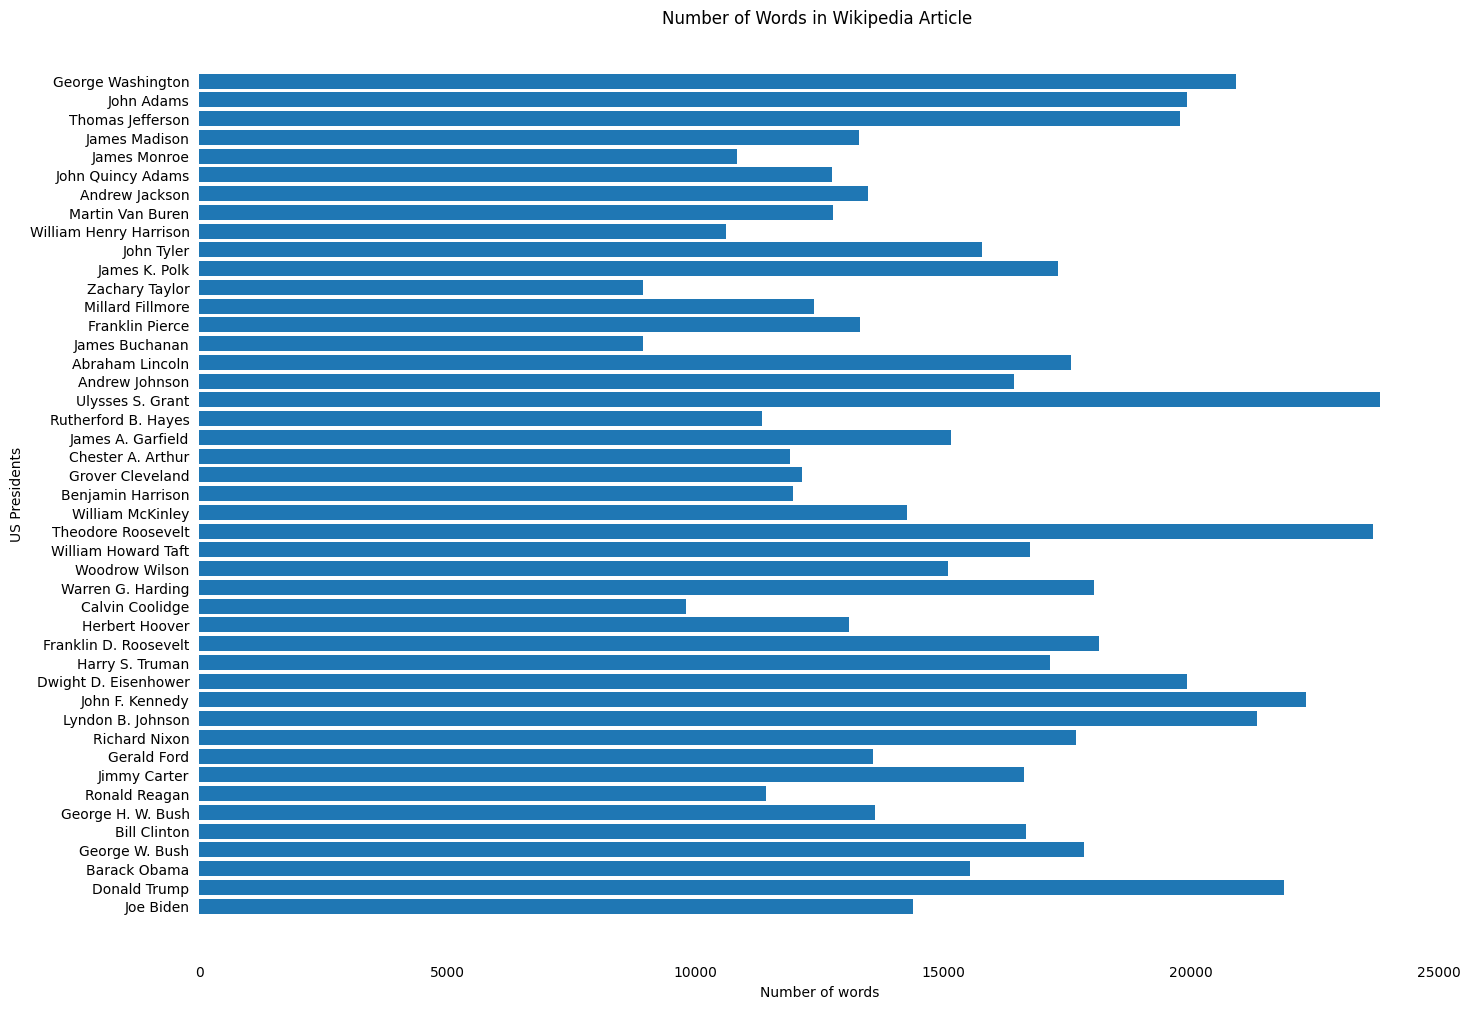

In [ ]:
data="US_presidents.csv"
df = pd.read_csv(data, index_col=1)
name = df['name']
n_words= df['n_words']

fig,ax = plt.subplots(figsize =(16,12))
ax.barh(name, n_words)


for s in ['top','bottom','left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.invert_yaxis()

ax.set_xlabel('Number of words')
ax.set_ylabel('US Presidents')
ax.set_title('Number of Words in Wikipedia Article ')

# # show the plot
plt.show()

**4.3** Add a new column to a given DataFrame that contains the number of years each US president served in office. Then, create a bar plot that shows the length of each presidency in chronological order, as given in the file ``office_terms.pdf``. Make sure to label the x-axis and y-axis appropriately for clarity. (Hint: Set the width to 2000 and the height to 400.) "

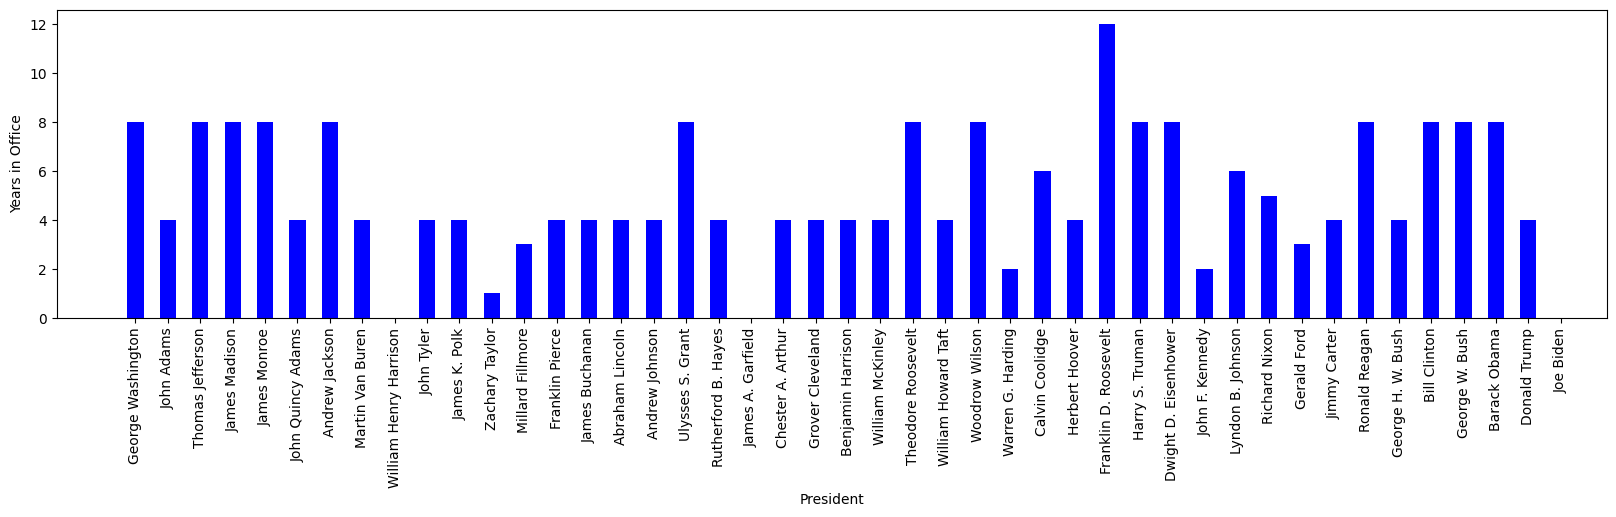

In [ ]:
df = pd.read_csv('US_presidents.csv', index_col=0)

name = df['name']
length_of_presidency = [end - start for start, end in zip(df['start'], df['end'])]

plt.figure(figsize=(20, 4))
plt.bar(name,length_of_presidency, width=0.5, color='blue')

plt.xlabel('President')
plt.ylabel('Years in Office')

plt.xticks(rotation=90)

# show the plot
plt.show()

**4.4** Add a new column to a given DataFrame for each US president that stores the count of how many times the last name of that president appears in the Wikipedia articles of the other presidents. Then, use the ``px.imshow`` function to create a heatmap plot that replicates the same visualization as shown in ``occurrence.pdf``. The heatmap should show only the 20 most recent presidents and the count should be reduced to a maximum value of 100 to improve readability.

In [ ]:

data='US_presidents.csv'
df = pd.DataFrame(data)

# Function to count occurrences of a president's last name in others' Wikipedia articles
def count_last_name_occurrences(president, all_presidents):
    last_name = president.split()[-1]  # Extract the last name
    counts = []
    for other_president in all_presidents:
        if president != other_president:
            count = other_president.count(last_name)
            counts.append(min(count, 100))  # Limit count to a maximum of 100
    return counts

# Clean up president names and ensure they match between DataFrame and count_matrix
df['President'] = df['President'].str.strip()  # Remove extraneous whitespace
presidents_cleaned = df['President'].tolist()  # Get the cleaned president names

# Create a list of counts for each president
count_matrix = [count_last_name_occurrences(president, presidents_cleaned) for president in presidents_cleaned]

# Create a DataFrame from the count matrix
count_df = pd.DataFrame(count_matrix, columns=presidents_cleaned, index=presidents_cleaned)

# Create a heatmap using Plotly
fig = px.imshow(count_df,
                labels=dict(x="President", y="President"),
                x=presidents_cleaned,
                y=presidents_cleaned,
                color_continuous_scale="Viridis",  # You can change the color scale
                zmin=0,
                zmax=100,  # Limit the count to a maximum of 100
                title="Last Name Occurrences in Wikipedia Articles of Other Presidents")

# Show the heatmap
fig.show()


ValueError: ignored